## Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

  Instructions

------------

  This file contains code that helps you get started on the
  linear exercise. You will need to complete the following functions
  in this exericse:

     lrCostFunction.m (logistic regression cost function)
     oneVsAll.m
     predictOneVsAll.m
     predict.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

> 由于MATLAB源码的theta形状总是变来变去，干脆统一用行向量表示

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

from ex3.displayData import displayData
from ex3.lrCostFunction import lrCostFunction
from ex3.oneVsAll import oneVsAll
from ex3.predictOneVsAll import predictOneVsAll

In [2]:
# Setup the parameters you will use for this part of the exercise


input_layer_size = 400  # 20x20 Input Images of Digits
num_labels = 10  # 10 labels, from 1 to 10
                 # (note that we have mapped "0" to label 1

In [3]:
# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.

# Load Training Data
print('Loading and Visualizing Data ...')

data = loadmat('ex3data1.mat')  # training data stored in arrays X, y
X = data['X']
y = data['y']

m = y.shape[0]

Loading and Visualizing Data ...


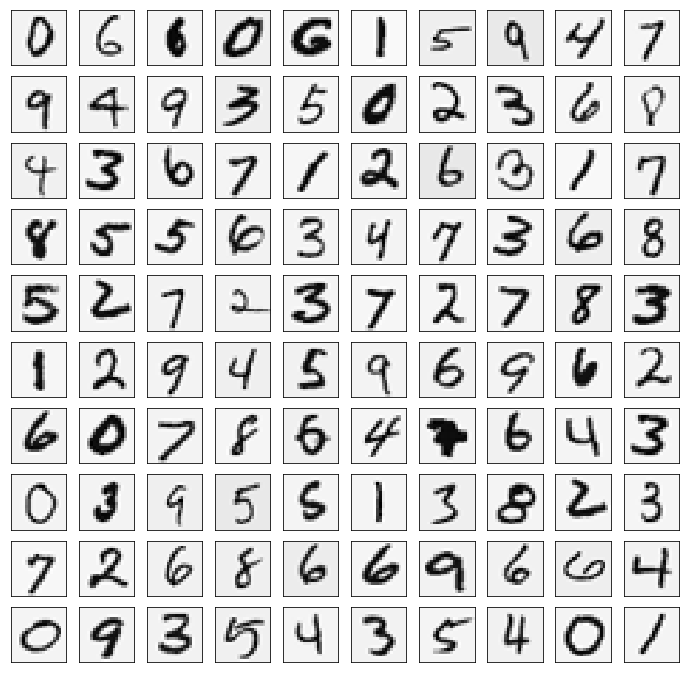

In [4]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(np.arange(m), 100)
sel = X[rand_indices, :]

displayData(sel)

plt.show()

In [5]:
# ============ Part 2a: Vectorize Logistic Regression ============
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.


# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization')

theta_t = np.array([[-2, -1, 1, 2]])
X_t = np.insert(np.arange(1, 16, 1).reshape(3, 5).T / 10, 0, np.ones(5), axis=1)
y_t = np.array([[1, 0, 1, 0, 1]]).reshape(-1, 1)

lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('\nCost: %.6f' % J)
print('Expected cost: 2.534819')
print('Gradients:')
print(np.around(grad, decimals=6))
print('Expected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003')


Testing lrCostFunction() with regularization

Cost: 2.534819
Expected cost: 2.534819
Gradients:
[[ 0.146561 -0.548558  0.724722  1.398003]]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [6]:
# ============ Part 2b: One-vs-All Training ============
X = np.insert(X, 0, np.ones(m), axis=1)

print('\nTraining One-vs-All Logistic Regression...\n')

_lambda = 0.1
all_theta = oneVsAll(X, y, num_labels, _lambda)


Training One-vs-All Logistic Regression...



In [7]:
# ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X)

print('\nTraining Set Accuracy: %f\n' % ((np.mean(pred == y)) * 100))
print('MATLAB上的答案是94.98，我的答案是96.46，不知道是我错了还是精度的问题')


Training Set Accuracy: 96.460000

MATLAB上的答案是94.98，我的答案是96.46，不知道是我错了还是精度的问题
